# Curso de introducción al análisis y modelado de datos con Python 

<img src="../images/cacheme.png" alt="logo" style="width: 150px;"/>
<img src="../images/aeropython_logo.png" alt="logo" style="width: 115px;"/>

---

# Pandas: Funciones rolling y operaciones con DataFrames

En este notebook trabajaremos sobre los mismos datos que la introducción a pandas. Veremos como usar el método rolling para obtener resultados como la media móvil, la desviación típica móvil... Además veremos como agrupar los datos usando `groupby` y cómo pivotar tablas.

## Cargando los datos

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
# Carga de los datos: data_all
# columnas: [0, 1, 3, 4, 5, 6, 8, 10, 11, 12, 13]
# ['DIR', 'DATE', 'NAME', 'PRECIP', 'PMAX', 'PMIN', 'MAG_MAX', 'TMAX', 'TMED', 'TMIN', 'MAG_MED']

data_all = pd.read_csv(
    "../data/alicante_climate_AEMET.csv",
    skiprows=3,
    delimiter='\t',
    usecols=[0, 1, 3, 4, 5, 6, 8, 10, 11, 12, 13],
    names=['DIR', 'DATE', 'NAME', 'PRECIP', 'PMAX', 'PMIN', 'MAG_MAX', 'TMAX', 'TMED', 'TMIN', 'MAG_MED'],
    parse_dates=['DATE'],
    index_col=['DATE']
    )

data_all.head()

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,,
2015-01-01,14.0,ALICANTE/ALACANT,0.0,1027.2,1019.8,4.7,16.0,9.6,3.2,1.4
2015-01-01,5.0,PINOSO,0.0,NaN,NaN,4.4,12.1,3.7,-4.7,1.1
2015-01-01,NaN,ALICANTE-ELCHE AEROPUERTO,0.0,1033.5,1026.0,NaN,15.9,10.8,5.7,1.9
2015-01-02,19.0,ALICANTE/ALACANT,0.0,1028.8,1025.3,4.2,18.1,10.0,2.0,1.1
2015-01-02,99.0,PINOSO,0.0,NaN,NaN,2.8,16.2,5.8,-4.6,1.1


<div class="alert alert-info">Para acordarnos de cómo parsear las fechas: http://strftime.org/</div>

In [3]:
# Dejamos en data sólo ALICANTE/ALACANT
data = data_all[data_all['NAME'] == 'ALICANTE/ALACANT']

### Funciones "rolling" 

Ya sabemos obtener representaciones gráficas de nuestros de datos. Visualicemos, por ejemplo, la evolución de la temperatura media a lo largo de los años 2015 y 2016:

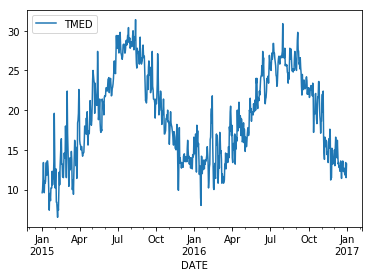

In [4]:
# temperatua media en el 205-2016
data.loc['2015-01-01':'2016-12-31'].plot(y='TMED')

Se puede apreciar la oscilación a lo largo del año. Sin embargo, las variaciones locales de temperatura de determinados días "ensucian" nuestra representación. Una opción es "suavizar" la curva utilizando una media móvil

Pandas proporciona métodos para calcular magnitudes como medias móviles usando el método `rolling`:

In [5]:
# Calcular la media de la columna TMED
data.TMED.mean()

19.031718464351005

In [6]:
# Media centrada (semanal/mensual/trimestral)
data.loc['2015-01-01':'2016-12-31'].TMED.rolling(7, center=True).mean().head(15)

DATE
2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04    10.828571
2015-01-05    11.000000
2015-01-06    11.142857
2015-01-07    11.314286
2015-01-08    11.314286
2015-01-09    11.457143
2015-01-10    12.028571
2015-01-11    12.385714
2015-01-12    12.685714
2015-01-13    12.771429
2015-01-14    12.328571
2015-01-15    11.471429
Name: TMED, dtype: float64

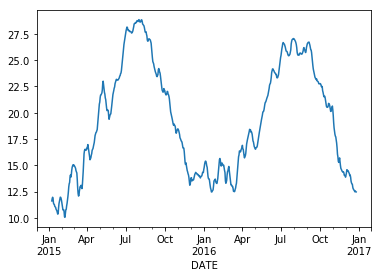

In [7]:
# pintar media centrada (semanal/mensual/trimestral)
data.loc['2015-01-01':'2016-12-31'].TMED.rolling(14, center=True).mean().plot()

## Creando agrupaciones 

En muchas ocasiones queremos realizar agrupaciones de datos en base a determinados valores como son fechas, o etiquetas (por ejemplo, datos que pertenecen a un mismo ensayo o lugar).

In [8]:
# Agrupar por estación metereológica
gby_name = data_all.groupby('NAME')

gby_name

In [9]:
# media
gby_name.mean()

,DIR,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
NAME,,,,,,,,,
ALICANTE-ELCHE AEROPUERTO,45.854225,0.725592,1017.294907,1012.723056,10.362581,24.452724,19.371468,14.289566,3.746182
ALICANTE/ALACANT,20.983225,0.801885,1011.154479,1006.691865,8.047064,24.039488,19.031718,14.022212,2.220279
PINOSO,23.553150,0.788158,NaN,NaN,7.703543,22.501610,15.263352,8.023485,1.658014


In [10]:
# Media y desviación estándar
gby_name.agg(['mean', 'std'])

DIR               PRECIP            \
                                mean        std      mean       std   
NAME                                                                  
ALICANTE-ELCHE AEROPUERTO  45.854225  40.236246  0.725592  4.628997   
ALICANTE/ALACANT           20.983225  21.613931  0.801885  5.249819   
PINOSO                     23.553150  21.392580  0.788158  4.706956   

                                  PMAX                   PMIN            \
                                  mean       std         mean       std   
NAME                                                                      
ALICANTE-ELCHE AEROPUERTO  1017.294907  6.160991  1012.723056  6.641275   
ALICANTE/ALACANT           1011.154479  6.074767  1006.691865  6.570117   
PINOSO                             NaN       NaN          NaN       NaN   

                             MAG_MAX                 TMAX            \
                                mean       std       mean       std   
NAME                                                                  
ALICANTE-ELCHE AEROPUERTO  10.362581  3.627198  24.452724  5.758350   
ALICANTE/ALACANT            8.047064  2.833214  24.039488  5.670956   
PINOSO                      7.703543  3.842040  22.501610  7.584561   

                                TMED                 TMIN             MAG_MED  \
                                mean       std       mean       std      mean   
NAME                                                                            
ALICANTE-ELCHE AEROPUERTO  19.371468  5.723339  14.289566  6.023004  3.746182   
ALICANTE/ALACANT           19.031718  5.660407  14.022212  5.952143  2.220279   
PINOSO                     15.263352  6.618715   8.023485  6.222666  1.658014   

                                     
                                std  
NAME                                 
ALICANTE-ELCHE AEROPUERTO  1.754999  
ALICANTE/ALACANT           0.811738  
PINOSO                     1.162012

### Creando agrupaciones: analizando el mes típico

En muchas ocasiones queremos realizar agrupaciones de datos en base a determinados valores como son fechas, o etiquetas (por ejemplo, datos que pertenecen a un mismo ensayo o lugar).

En este caso, imaginemos que nos interesa obtener una representación del "mes típico" o "día típico"

Podemos agrupar nuestros datos utilizando `groupby`:

In [11]:
# Agruparemos por año y mes: creemos dos columnas nuevas
data['year'] = data.index.year
data['month'] = data.index.month

/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Creamos la agrupación
monthly = data.groupby(by=['year', 'month'])

In [13]:
# Podemos ver los grupos que se han creado
monthly.groups.keys()

dict_keys([(2015, 1), (2015, 2), (2015, 3), (2015, 4), (2015, 5), (2015, 6), (2015, 7), (2015, 8), (2015, 9), (2015, 10), (2015, 11), (2015, 12), (2016, 1), (2016, 2), (2016, 3), (2016, 4), (2016, 5), (2016, 6), (2016, 7), (2016, 8), (2016, 9), (2016, 10), (2016, 11), (2016, 12), (2017, 1), (2017, 2), (2017, 3), (2017, 4), (2017, 5), (2017, 6), (2017, 7), (2017, 8), (2017, 9), (2017, 10), (2017, 11), (2017, 12)])

Con estos grupos podemos hacer hacer varias cosas:

* Acceder a sus datos individualmente (por ejemplo, comprobar qué pasó cada día de marzo de 2016) 
* Realizar una reducción de datos, para comparar diversos grupos (por, ejemplo caracterizar el tiempo de cada mes a lo largo de los años)

In [14]:
# Accedemos a un grupo
monthly.get_group((2016,3)).head()

,DIR,NAME,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED,year,month
DATE,,,,,,,,,,,,
2016-03-01,14.0,ALICANTE/ALACANT,0.0,1016.0,1010.8,6.1,17.8,12.7,7.6,1.9,2016,3
2016-03-02,28.0,ALICANTE/ALACANT,0.0,1013.6,1006.4,12.5,25.9,17.2,8.5,2.8,2016,3
2016-03-03,36.0,ALICANTE/ALACANT,0.0,1009.0,1005.1,11.7,22.7,16.5,10.3,3.9,2016,3
2016-03-04,18.0,ALICANTE/ALACANT,0.0,1006.0,993.6,10.3,21.2,14.6,8.1,2.2,2016,3
2016-03-05,27.0,ALICANTE/ALACANT,0.0,1000.8,994.0,13.6,18.9,14.9,10.9,5.3,2016,3


In [15]:
# Hacemos una agregación de los datos:
monthly_mean = monthly.mean()
monthly_mean.head(24)

DIR    PRECIP         PMAX         PMIN    MAG_MAX  \
year month                                                             
2015 1      29.161290  0.331034  1016.361290  1009.735484   7.719355   
     2      25.928571  0.192857  1010.696429  1004.250000  11.839286   
     3      21.193548  0.693333  1011.687097  1007.348387   8.393548   
     4      17.000000  0.433333  1012.096667  1007.696667   9.146667   
     5      15.483871  0.148387  1010.396774  1005.709677   7.835484   
     6      22.000000  0.086667  1009.510000  1006.440000   7.993333   
     7      17.322581  0.020000  1007.470968  1004.212903   7.654839   
     8      16.451613  0.086667  1007.641935  1004.012903   8.196774   
     9      19.230769  2.806667  1008.073333  1004.160000   8.165385   
     10     20.000000  1.693333  1007.932258  1004.461290   7.293548   
     11     19.000000  1.566667  1016.716667  1011.890000   7.200000   
     12     20.129032  0.000000  1021.835484  1018.300000   5.196774   
2016 1      22.806452  0.251613  1015.125806  1009.748387   8.374194   
     2      23.310345  0.050000  1012.420690  1005.127586  10.641379   
     3      26.258065  0.346667  1008.154839  1002.767742   8.893548   
     4      32.500000  0.520000  1006.433333  1001.720000   8.620000   
     5      19.250000  0.414286  1007.564516  1003.483871   8.832143   
     6      15.466667  0.000000  1008.573333  1004.343333   7.946667   
     7      20.774194  0.141935  1009.441935  1006.335484   7.787097   
     8      23.096774  0.032258  1010.770968  1007.200000   7.664516   
     9      21.300000  0.151724  1010.483333  1007.173333   7.620000   
     10     25.129032  1.464516  1009.232258  1004.961290   6.725806   
     11     21.700000  1.142857  1008.620000  1004.130000   7.586667   
     12     27.758621  4.092857  1018.525806  1013.958065   6.341379   

                 TMAX       TMED       TMIN   MAG_MED  
year month                                             
2015 1      17.709677  11.464516   5.222581  1.848387  
     2      16.553571  11.960714   7.360714  2.842857  
     3      19.667742  14.696774   9.709677  2.264516  
     4      21.283333  16.920000  12.550000  2.750000  
     5      26.587097  21.203226  15.809677  2.319355  
     6      29.503333  24.003333  18.513333  2.356667  
     7      32.900000  28.183871  23.474194  2.406452  
     8      31.800000  27.764516  23.735484  2.429032  
     9      28.043333  23.336667  18.650000  2.134615  
     10     24.867742  20.261290  15.648387  1.974194  
     11     21.546667  15.893333  10.236667  1.866667  
     12     19.470968  13.929032   8.377419  1.458065  
2016 1      18.935484  13.793548   8.658065  2.116129  
     2      19.255172  14.455172   9.658621  2.634483  
     3      20.000000  14.545161   9.116129  2.551613  
     4      21.963333  17.036667  12.113333  2.493333  
     5      24.158065  19.216129  14.274194  2.427586  
     6      28.316667  23.550000  18.770000  2.483333  
     7      31.074194  26.287097  21.490323  2.351613  
     8      30.364516  25.877419  21.364516  2.380645  
     9      29.663333  24.526667  19.393333  2.146667  
     10     25.890323  21.074194  16.248387  1.725806  
     11     20.760000  15.783333  10.783333  2.013333  
     12     17.787097  13.329032   8.883871  1.676667

### Pivotando tablas

En ocasiones podemos querer ver nuestros datos de forma diferente o necesitamos organizarlos así para utilizar determinadas funciones de `pandas`. Una necesidad típica es la de pivotar una tabla.

    Imagina que queremos acceder a los mismos datos que en el caso anterior, pero que ahora queremos ver los años en las filas y para cada variable (TMAX, TMED...) los calores de cada mes en una columna. ¿Cómo lo harías?

In [16]:
# Dejar los años como índices y ver la media mensual en cada columna
pivoted = monthly_mean.reset_index().pivot(index='year', columns='month')
pivoted

DIR                                                               \
month         1          2          3     4          5          6          7    
year                                                                            
2015   29.161290  25.928571  21.193548  17.0  15.483871  22.000000  17.322581   
2016   22.806452  23.310345  26.258065  32.5  19.250000  15.466667  20.774194   
2017   22.483871  19.535714  19.966667  16.2  21.100000  12.400000  11.857143   

                                          ...      MAG_MED            \
month         8          9          10    ...           3         4    
year                                      ...                          
2015   16.451613  19.230769  20.000000    ...     2.264516  2.750000   
2016   23.096774  21.300000  25.129032    ...     2.551613  2.493333   
2017   22.090909  14.333333  17.677419    ...     2.260000  2.323333   

                                                                             \
month        5         6         7         8         9         10        11   
year                                                                          
2015   2.319355  2.356667  2.406452  2.429032  2.134615  1.974194  1.866667   
2016   2.427586  2.483333  2.351613  2.380645  2.146667  1.725806  2.013333   
2017   2.406452  2.420000  2.257143  2.138095  2.280000  1.725806  1.643333   

                 
month        12  
year             
2015   1.458065  
2016   1.676667  
2017   2.164516  

[3 rows x 108 columns]

La línea anterior no es sencilla y no se escribe de una sola vez sin errores (sobre todo si estás empezando). Esto es una ejemplo de que `pandas` es una librería potente, pero que lleva tiempo aprender. Pasarás muchas horas peleando contra problemas de este tipo, pero afortunadamente mucha gente lo ha pasado mal antes y su experiencia ha quedado plasmada en cientos de **preguntas de `stack overflow`** y en la **documentación de `pandas`**

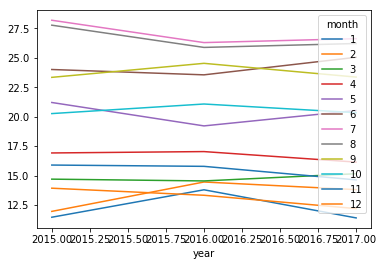

In [17]:
pivoted.TMED.plot()

#### Otro ejemplo

In [18]:
pivot = data_all.pivot(columns='NAME')
pivot

DIR                           \
NAME       ALICANTE-ELCHE AEROPUERTO ALICANTE/ALACANT PINOSO    
DATE                                                            
2015-01-01                       NaN             14.0     5.0   
2015-01-02                      99.0             19.0    99.0   
2015-01-03                      25.0             99.0    22.0   
2015-01-04                      25.0              6.0    21.0   
2015-01-05                       2.0             99.0    22.0   
2015-01-06                      25.0              7.0    33.0   
2015-01-07                      34.0             12.0     7.0   
2015-01-08                      16.0             13.0    99.0   
2015-01-09                      99.0             18.0    22.0   
2015-01-10                      25.0             20.0    22.0   
2015-01-11                      26.0             31.0     1.0   
2015-01-12                      99.0              7.0    10.0   
2015-01-13                      21.0             23.0    35.0   
2015-01-14                      26.0              7.0     5.0   
2015-01-15                      99.0             20.0    18.0   
2015-01-16                      26.0             31.0    27.0   
2015-01-17                      29.0             30.0    31.0   
2015-01-18                      99.0             19.0    22.0   
2015-01-19                      99.0             36.0     2.0   
2015-01-20                      27.0             34.0    32.0   
2015-01-21                      99.0             30.0    28.0   
2015-01-22                      29.0             33.0    33.0   
2015-01-23                      29.0             33.0    33.0   
2015-01-24                      30.0             99.0    33.0   
2015-01-25                      30.0             30.0    31.0   
2015-01-26                      25.0             14.0    99.0   
2015-01-27                      26.0             28.0    33.0   
2015-01-28                      31.0             18.0    27.0   
2015-01-29                      29.0             28.0    24.0   
2015-01-30                      27.0             22.0    26.0   
...                              ...              ...     ...   
2017-12-02                      29.0             36.0    32.0   
2017-12-03                      99.0             32.0    32.0   
2017-12-04                      99.0             11.0     8.0   
2017-12-05                      99.0             22.0    22.0   
2017-12-06                      31.0             14.0    16.0   
2017-12-07                      31.0             20.0    19.0   
2017-12-08                      27.0             30.0    28.0   
2017-12-09                      31.0              7.0    29.0   
2017-12-10                      23.0             25.0    28.0   
2017-12-11                      99.0             32.0    23.0   
2017-12-12                      28.0             12.0    32.0   
2017-12-13                      99.0             99.0    32.0   
2017-12-14                      30.0             28.0    31.0   
2017-12-15                      99.0             26.0    28.0   
2017-12-16                      31.0             34.0    34.0   
2017-12-17                      99.0             12.0    33.0   
2017-12-18                      99.0             30.0    16.0   
2017-12-19                       2.0              2.0     4.0   
2017-12-20                      26.0             12.0    36.0   
2017-12-21                      36.0             36.0     6.0   
2017-12-22                       2.0              6.0    31.0   
2017-12-23                      99.0              6.0     8.0   
2017-12-24                      15.0             20.0    17.0   
2017-12-25                      99.0             19.0    26.0   
2017-12-26                      29.0             31.0    30.0   
2017-12-27                      99.0             30.0    29.0   
2017-12-28                      27.0             31.0    28.0   
2017-12-29                      99.0             27.0    27.0   
201

In [19]:
# Seleccionando sólo una estación
pivot.xs('ALICANTE/ALACANT', axis=1, level=1).head()

,DIR,PRECIP,PMAX,PMIN,MAG_MAX,TMAX,TMED,TMIN,MAG_MED
DATE,,,,,,,,,
2015-01-01,14.0,0.0,1027.2,1019.8,4.7,16.0,9.6,3.2,1.4
2015-01-02,19.0,0.0,1028.8,1025.3,4.2,18.1,10.0,2.0,1.1
2015-01-03,99.0,0.0,1027.8,1022.5,7.2,19.5,11.3,3.1,2.2
2015-01-04,6.0,0.0,1022.5,1020.4,6.1,20.3,13.4,6.5,1.7
2015-01-05,99.0,0.0,1021.5,1017.0,4.2,16.9,10.8,4.8,1.1


In [20]:
# Agrupando por estación y mes
meteo_station = data_all.groupby(['NAME', data_all.index.month]).mean()
meteo_station

DIR    PRECIP         PMAX         PMIN  \
NAME                      DATE                                                  
ALICANTE-ELCHE AEROPUERTO 1     51.586957  1.392135  1021.263441  1015.363441   
                          2     36.797619  0.242857  1018.132143  1011.577381   
                          3     46.000000  1.340000  1016.780645  1011.780645   
                          4     40.883721  0.282558  1016.202299  1011.768966   
                          5     49.344444  0.154945  1015.282222  1010.633333   
                          6     44.359551  0.051136  1014.495556  1010.845556   
                          7     49.488636  0.121111  1014.171591  1010.888636   
                          8     39.010989  0.539326  1014.930435  1011.251087   
                          9     45.056818  0.693182  1015.443182  1011.514773   
                          10    45.817204  1.326667  1016.380645  1012.535484   
                          11    48.622222  1.071264  1018.573034  1013.822472   
                          12    52.236559  1.410000  1025.501075  1020.262366   
ALICANTE/ALACANT          1     24.817204  1.093333  1014.941935  1009.140860   
                          2     22.929412  0.168293  1011.856471  1005.461176   
                          3     22.500000  1.938462  1010.544086  1005.711828   
                          4     21.900000  0.375281  1009.906667  1005.516667   
                          5     18.561798  0.182022  1009.113978  1004.629032   
                          6     16.622222  0.031461  1008.626667  1005.093333   
                          7     16.811111  0.149451  1008.090110  1004.905495   
                          8     20.380952  0.664835  1009.052688  1005.459140   
                          9     18.244186  1.375862  1009.555556  1005.701111   
                          10    20.935484  1.254945  1010.394624  1006.639785   
                          11    22.822222  1.014118  1012.397778  1007.757778   
                          12    24.989011  1.344186  1019.234409  1014.054839   
PINOSO                    1     28.946237  1.117391          NaN          NaN   
                          2     22.716418  0.305882          NaN          NaN   
                          3     24.822581  2.372857          NaN          NaN   
                          4     21.250000  0.703529          NaN          NaN   
                          5     24.322581  0.356989          NaN          NaN   
                          6     19.388889  0.397778          NaN          NaN   
                          7     20.978495  0.138043          NaN          NaN   
                          8     26.548387  0.527174          NaN          NaN   
                          9     21.266667  0.987778          NaN          NaN   
                          10    22.913043  0.642391          NaN          NaN   
                          11    28.422222  0.878889          NaN          NaN   
                          12    20.376344  1.361290          NaN          NaN   

                                  MAG_MAX       TMAX       TMED       TMIN  \
NAME                      DATE                                               
ALICANTE-ELCHE AEROPUERTO 1     11.051087  17.841935  12.340860   6.840860   
                          2     13.520238  18.767857  13.702381   8.638095   
                          3     11.383871  20.716129  15.021505   9.323656   
                          4     10.839535  22.339080  17.136782  11.937931   
                          5     10.231111  26.419101  20.742697  15.075281   
                          6     10.194382  29.665556  24.356667  19.046667   
                          7      9.781818  31.959341  27.232967  22.493407   
                          8     10.181319  31.225000  27.095652  22.973913   
                          9      9.953409  29.198864  24.371591  19.547727   
                          10     8.943011  25.843011  21.147312  16.452688   
                       

In [21]:
# pivotando para que el mes sea el índice
meteo_station.reset_index().pivot(columns='NAME', index='DATE')

DIR                              \
NAME ALICANTE-ELCHE AEROPUERTO ALICANTE/ALACANT    PINOSO    
DATE                                                         
1                    51.586957        24.817204  28.946237   
2                    36.797619        22.929412  22.716418   
3                    46.000000        22.500000  24.822581   
4                    40.883721        21.900000  21.250000   
5                    49.344444        18.561798  24.322581   
6                    44.359551        16.622222  19.388889   
7                    49.488636        16.811111  20.978495   
8                    39.010989        20.380952  26.548387   
9                    45.056818        18.244186  21.266667   
10                   45.817204        20.935484  22.913043   
11                   48.622222        22.822222  28.422222   
12                   52.236559        24.989011  20.376344   

                        PRECIP                             \
NAME ALICANTE-ELCHE AEROPUERTO ALICANTE/ALACANT   PINOSO    
DATE                                                        
1                     1.392135         1.093333  1.117391   
2                     0.242857         0.168293  0.305882   
3                     1.340000         1.938462  2.372857   
4                     0.282558         0.375281  0.703529   
5                     0.154945         0.182022  0.356989   
6                     0.051136         0.031461  0.397778   
7                     0.121111         0.149451  0.138043   
8                     0.539326         0.664835  0.527174   
9                     0.693182         1.375862  0.987778   
10                    1.326667         1.254945  0.642391   
11                    1.071264         1.014118  0.878889   
12                    1.410000         1.344186  1.361290   

                          PMAX                           \
NAME ALICANTE-ELCHE AEROPUERTO ALICANTE/ALACANT PINOSO    
DATE                                                      
1                  1021.263441      1014.941935     NaN   
2                  1018.132143      1011.856471     NaN   
3                  1016.780645      1010.544086     NaN   
4                  1016.202299      1009.906667     NaN   
5                  1015.282222      1009.113978     NaN   
6                  1014.495556      1008.626667     NaN   
7                  1014.171591      1008.090110     NaN   
8                  1014.930435      1009.052688     NaN   
9                  1015.443182      1009.555556     NaN   
10                 1016.380645      1010.394624     NaN   
11                 1018.573034      1012.397778     NaN   
12                 1025.501075      1019.234409     NaN   

                          PMIN    ...          TMAX                      TMED  \
NAME ALICANTE-ELCHE AEROPUERTO    ...       PINOSO  ALICANTE-ELCHE AEROPUERTO   
DATE                              ...                                           
1                  1015.363441    ...     13.778495                 12.340860   
2                  1011.577381    ...     14.459259                 13.702381   
3                  1011.780645    ...     18.481690                 15.021505   
4                  1011.768966    ...     20.832941                 17.136782   
5                  1010.633333    ...     25.256989                 20.742697   
6                  1010.845556    ...     29.800000                 24.356667   
7                  1010.888636    ...     32.771111                 27.232967   
8                  1011.251087    ...     31.132967                 27.095652   
9                  1011.514773    ...     27.356180                 24.371591   
10                 1012.535484    ...     23.406593                 21.147312   
11                 1013.822472    ...     17.362222                 15.920000   
12                 1020.262366    ...     13.971739                 13.325806   

                                                      TMIN                   \

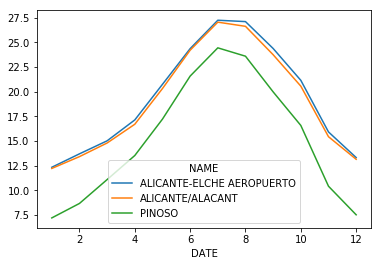

In [22]:
# pintándolo
meteo_station.reset_index().pivot(columns='NAME', index='DATE').plot(y='TMED')

### Visualizaciones especiales

#### scatter

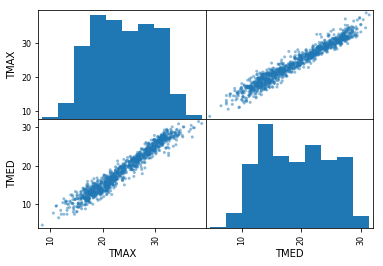

In [23]:
# scatter_matrix
from pandas.plotting import scatter_matrix
axes = scatter_matrix(data.loc[:, "TMAX":"TMED"])

#### lag_plot 

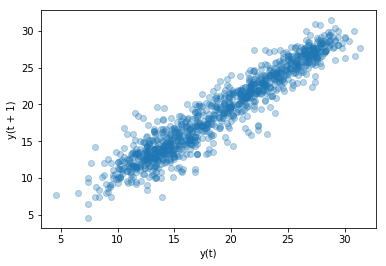

In [24]:
pd.plotting.lag_plot(data.TMED, lag=1, alpha=0.3)

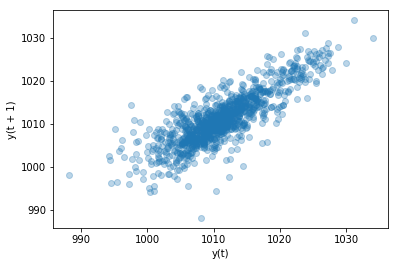

In [25]:
pd.plotting.lag_plot(data.PMAX, lag=1, alpha=0.3)

---

Hemos aprendido:
* A utilizar las funciones rolling
* A agrupar datos de un DataFrame utilizando sus columnas:
  - A agrupar con más de una variable
  - A acceder a distintos grupos
  - A obtener una reducción de datos para cada grupo
* A salvar nuestros datos
* A utilizar algunas representaciones especiales

###### Juan Luis Cano, Alejandro Sáez, Mabel Delgado

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [26]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../style/style.css'
HTML(open(css_file, "r").read())